# Explore NLP Exercises
Do your work for this exercise in a file named explore.

1. Spam Data
    - Load the spam data set. Data comes from https://www.kaggle.com/uciml/sms-spam-collection-dataset
    - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - Is there any overlap in the bigrams for the spam data and the ham data?
    - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
    
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [107]:
import matplotlib.pyplot as plt
# for colormap tools
from matplotlib import cm
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
from wordcloud import WordCloud

import prepare as p
import acquire as a

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [218]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# prep the data set
df = p.prep_nlp(df, content = 'text')

In [5]:
df.head()

,label,text,original,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [74]:
df.loc[90, 'text']

'Yeah do! Don\x89Û÷t stand to close tho- you\x89Û÷ll catch something!'

In [25]:
df['clean2'] = df['text'].apply(clean)

In [26]:
df.loc[90, 'clean2']

'yeah do donut stand to close tho youull catch something'

In [34]:
df.text.apply(lambda x :bool(re.search(r'\\x89Û÷', x)))

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: text, Length: 5572, dtype: bool

In [71]:
example = 'Yeah do! Don\x89Û÷t stand to close tho- you\x89Û÷ll catch something!'

re.findall(r'you.', example)

['you\x89']

In [72]:
c = '\x89Û÷'

In [73]:
unicodedata.normalize('NFKD', df.iloc[90, 1]).replace(c, "'")

"Yeah do! Don't stand to close tho- you'll catch something!"

In [79]:
df.text.apply(lambda x: unicodedata.normalize('NFKD', x).replace(c, "'"))

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

-------
After solving the problem of the weird unicode character, this is where I actually start exploring 

In [219]:
c = '\x89Û÷'

df['text'] = df.text.apply(lambda x: unicodedata.normalize('NFKD', x).replace(c, "'"))

In [220]:
df = p.prep_nlp(df, content = 'text')

In [83]:
df.loc[90, 'text']

"Yeah do! Don't stand to close tho- you'll catch something!"

In [86]:
df.head()

,label,text,original,clean,stemmed,lemmatized,clean2
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though,nah i dont think he goes to usf he lives aroun...


- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?

In [85]:
# counts of the types of words in each category
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [95]:
# create counts of each words
# this data is not stemmed or lemmatized 

ham_words = ' '.join(df[df.label == 'ham'].clean)
spam_words = ' '.join(df[df.label == 'spam'].clean)
all_words = ' '.join(df.clean)

In [99]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [100]:
ham_freq

u                                          986
im                                         454
2                                          305
get                                        303
ltgt                                       276
                                          ... 
whore                                        1
syrup                                        1
stuffing                                     1
friendshipmotherfatherteacherschildrens      1
hesitation                                   1
Length: 7410, dtype: int64

In [101]:
# create counts of each words
# this data is lemmatized

ham_words = ' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)

In [102]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [116]:
# create bigrams for ham and spam words
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20)
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20)

In [115]:
ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        41
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       33
(good, morning)    31
(wan, 2)           31
(new, year)        30
(take, care)       26
(im, going)        25
(u, get)           23
(u, wan)           23
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(happy, new)       19
(ltgt, min)        19
(good, night)      19
dtype: int64

In [138]:
spam_bigrams

(please, call)          44
(customer, service)     27
(contact, u)            24
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(await, collection)     19
(send, stop)            19
(every, week)           19
(urgent, mobile)        18
(land, line)            18
(claim, call)           17
(2, claim)              17
(valid, 12hrs)          17
(account, statement)    16
(sae, tc)               16
(call, 08000930705)     16
(ur, mob)               15
(reply, call)           15
dtype: int64

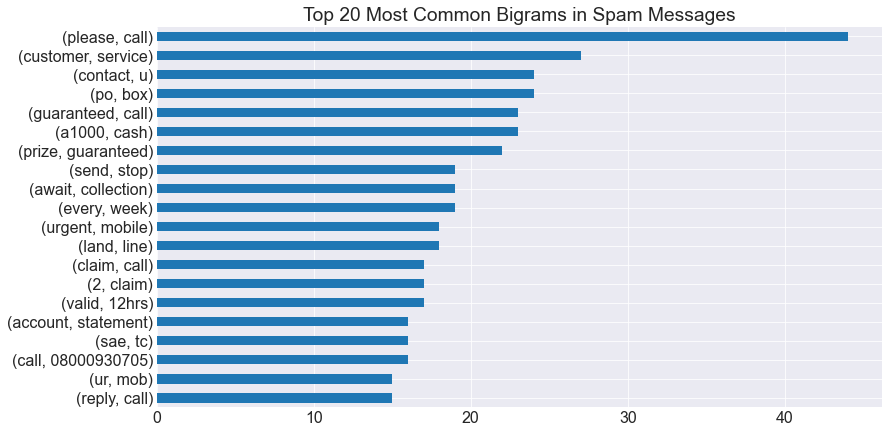

In [152]:
spam_bigrams.sort_values(ascending = True).plot.barh()
plt.title('Top 20 Most Common Bigrams in Spam Messages')
plt.show()

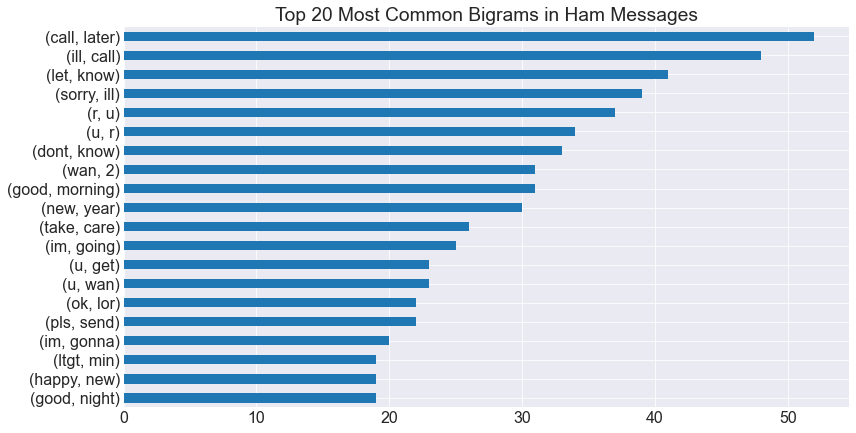

In [153]:
ham_bigrams.sort_values(ascending = True).plot.barh()
plt.title('Top 20 Most Common Bigrams in Ham Messages')
plt.show()

Are there some bigrams that are common in both? 

In [154]:
# create bigrams for all words
all_bigrams = pd.Series(nltk.bigrams(all_words.split())).value_counts().head(20)

<AxesSubplot:>

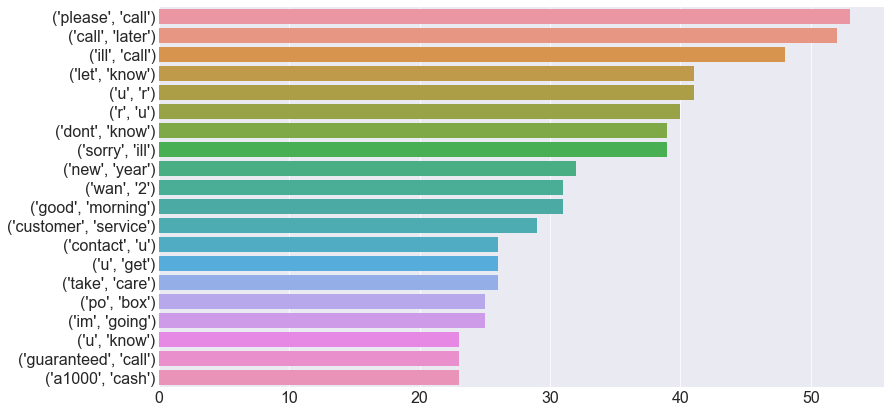

In [158]:
# try plotting with seaborn this time
sns.barplot(y = all_bigrams.index, x = all_bigrams.values)

In [224]:
spam_bigrams[spam_bigrams.isin(ham_bigrams)]

(prize, guaranteed, call)     21
(private, 2003, account)      13
(2003, account, statement)    13
(guaranteed, a1000, cash)     12
(camcorder, reply, call)      12
(show, 800, unredeemed)       12
(bonus, caller, prize)        11
(anytime, network, min)       11
(tone, 4, ur)                 11
(urgent, trying, contact)     11
(every, week, txt)            11
(free, entry, 2)              11
(please, call, customer)      11
dtype: int64

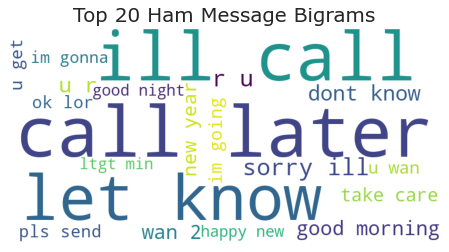

In [185]:
# create word cloud of all words
# create dictionary of words from the bigrams
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
# create wordcloud image
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
# show image
plt.imshow(img)
plt.title("Top 20 Ham Message Bigrams", font = 'Verdana', fontsize = 20)
plt.axis('off')
plt.show()

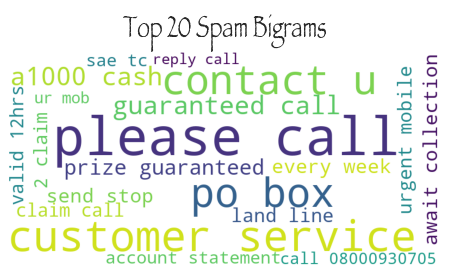

In [184]:
# create word cloud of spam Words
# create dictionary of words from the bigrams
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
# create wordcloud image
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
# show image
plt.imshow(img)
plt.axis('off')
plt.title("Top 20 Spam Bigrams", font = 'papyrus', fontsize= 30)
plt.show()

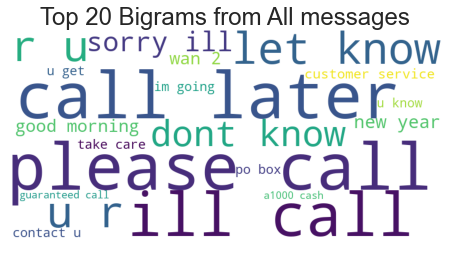

In [188]:
# create word cloud of ALL words
# create dictionary of words from the bigrams
data = {k[0] + ' ' + k[1]: v for k, v in all_bigrams.to_dict().items()}
# create wordcloud image
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
# show image
plt.imshow(img)
plt.axis('off')
plt.title("Top 20 Bigrams from All messages", font = 'Arial', fontsize= 24)
plt.show()

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [190]:
# create trigrams for spam words
ham_bigrams = pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(20)
spam_bigrams = pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(20)
all_bigrams = pd.Series(nltk.trigrams(all_words.split())).value_counts().head(20)


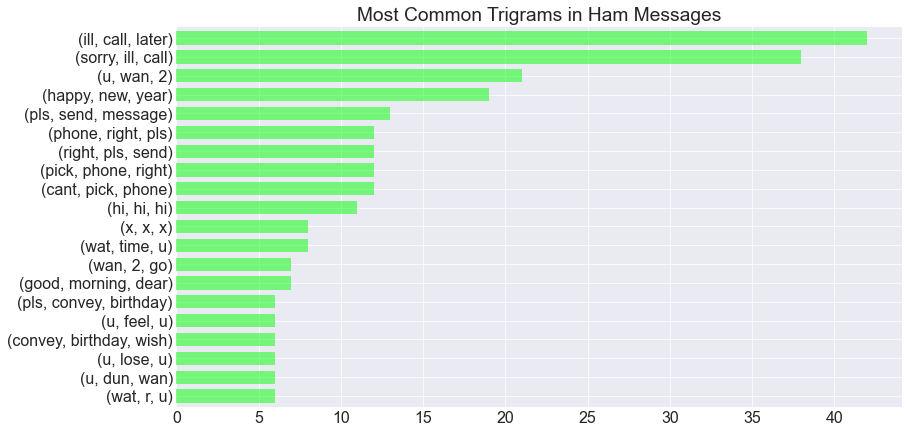

In [204]:
ham_bigrams.sort_values(ascending = True).plot.barh(color = 'lime', width = .7, alpha = .5)
plt.title("Most Common Trigrams in Ham Messages")
plt.show()

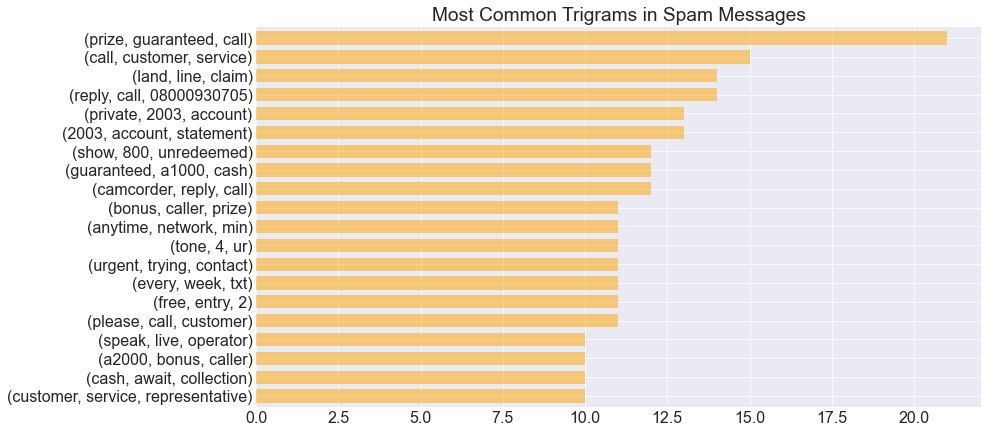

In [205]:
spam_bigrams.sort_values(ascending = True).plot.barh(color = 'orange', width = .7, alpha = .5)
plt.title("Most Common Trigrams in Spam Messages")
plt.show()

Seems like some of these trigrams are back to back. Like private 2003 account statement, and maybe please call customer service representative 

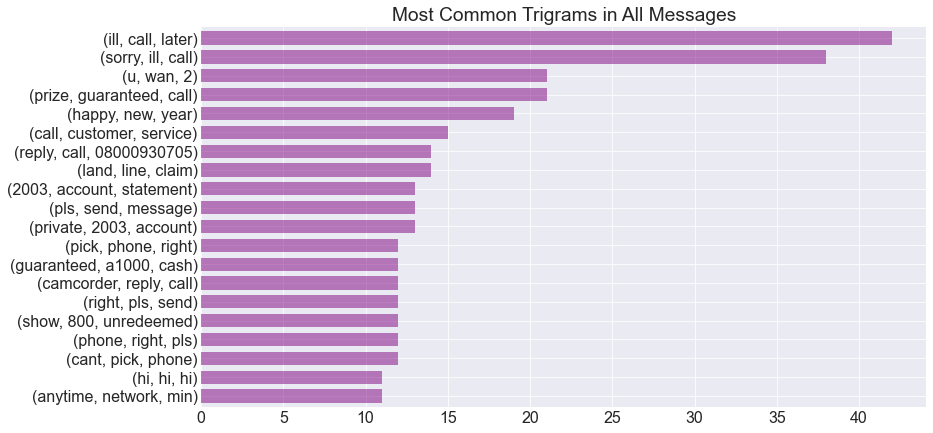

In [206]:
all_bigrams.sort_values(ascending = True).plot.barh(color = 'purple', width = .7, alpha = .5)
plt.title("Most Common Trigrams in All Messages")
plt.show()

Because of the large overlap in bigrams and trigrams in all the messages, it seems like the spam bigrams and trigrams are showing up more. Basically they get a lot more repetitive spam emails.

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.


In [225]:
# get data 
codeup_df = a.get_blog_articles()

In [226]:
# prep data
codeup_df = p.prep_nlp(codeup_df)

In [247]:
# join all articles together
blog_words = ' '.join(codeup_df.lemmatized)

In [249]:
blog_words_list = blog_words.split()

In [253]:
# most common words in blog posts
pd.Series(blog_words_list).value_counts().head(20)

data         64
science      23
learning     19
company      19
job          14
machine      13
model        12
scientist    11
like         10
one          10
new           9
education     8
work          8
make          8
big           7
business      7
recruiter     7
tech          7
look          7
student       7
dtype: int64

In [254]:
# least common words in blog posts
pd.Series(blog_words_list).value_counts().tail(20)

distribution    1
reveal          1
player          1
timeprepare     1
develop         1
soon            1
handson         1
opening         1
storing         1
cohort          1
database        1
campus          1
insert          1
said            1
antonioif       1
mention         1
plethora        1
nontechnical    1
type            1
etc             1
dtype: int64

In [255]:
word_counts = pd.Series(blog_words_list).value_counts()

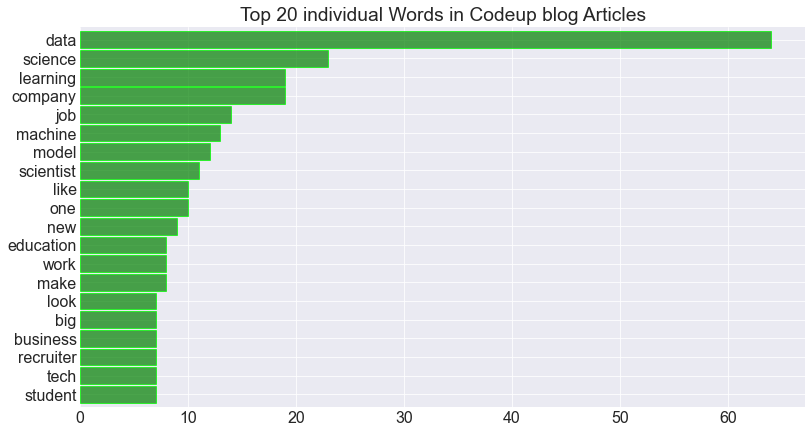

In [266]:
word_counts.head(20).sort_values(ascending = True).plot.barh(color = 'green', alpha = .7, ec = 'lime', width = .9)
plt.title('Top 20 individual Words in Codeup blog Articles')
plt.show()

In [319]:
word_counts

data            64
science         23
learning        19
company         19
job             14
                ..
mention          1
plethora         1
nontechnical     1
type             1
etc              1
Length: 862, dtype: int64

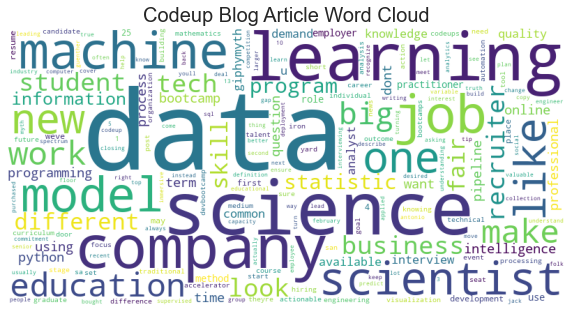

In [270]:
# create word cloud of ALL words
# create wordcloud image
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 8))
# show image
plt.imshow(img)
plt.axis('off')
plt.title("Codeup Blog Article Word Cloud", font = 'Arial', fontsize= 20)
plt.show()

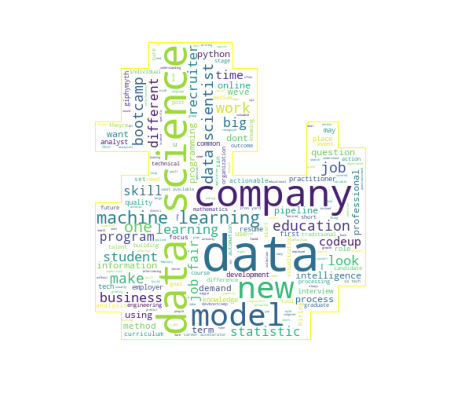

In [293]:
#Using a mask you can generate wordclouds in arbitrary shapes.

from PIL import Image
import numpy as np

mask = np.array(Image.open('codey_pic.png'))
img = WordCloud(background_color='white', width=800, height=400, 
                 contour_width = 1, contour_color = 'yellow', mask = mask)

img.generate(blog_words)
plt.imshow(img)
plt.axis('off')
plt.show()

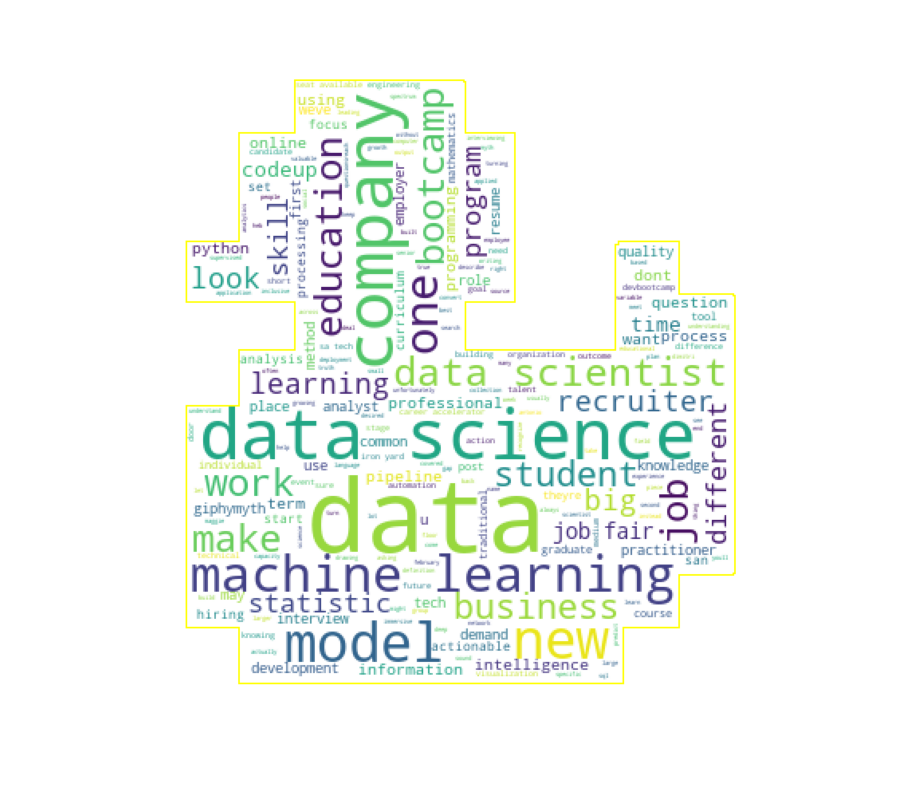

In [318]:
mask = np.array(Image.open('codey_pic.png'))
img = WordCloud(background_color='white', width=800, height=400, 
                 contour_width = 1, contour_color = 'yellow', mask = mask)

plt.figure(figsize = (16,16))
img.generate(blog_words)
plt.imshow(img)
plt.axis('off')
plt.show()

In [295]:
codeup_bigrams = pd.Series(nltk.bigrams(blog_words.split())).value_counts().head(20)
codeup_trigrams = pd.Series(nltk.trigrams(blog_words.split())).value_counts().head(20)

Text(0.5, 1.0, 'Most common Bigrams in the codeup blogs')

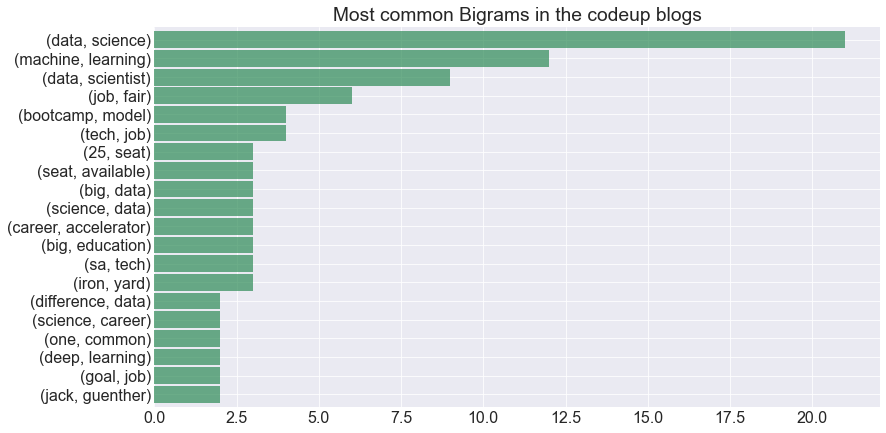

In [309]:
codeup_bigrams.sort_values(ascending = True).plot.barh(color = 'seagreen', alpha = .7, width = .9)
plt.title('Most common Bigrams in the codeup blogs')

Text(0.5, 1.0, 'Most common Trigrams in the codeup blogs')

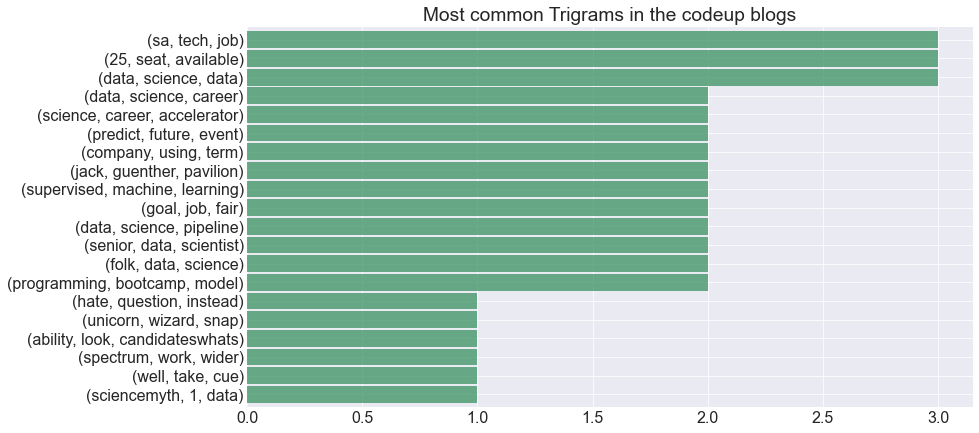

In [310]:
codeup_trigrams.sort_values(ascending = True).plot.barh(color = 'seagreen', alpha = .7, width = .9)
plt.title('Most common Trigrams in the codeup blogs')

#### Unicorn Wizard Snap?  
# 🦄🧙🏼‍♂️👌🏼

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [311]:
# acquire and prep data
news_df = a.get_blog_articles2()

news_df = p.prep_nlp(news_df)

In [356]:
# take a peak
news_df.head()

,title,content,category,original,clean,stemmed,lemmatized
0,Indian archer Deepika Kumari beats Bhutan's Ka...,Indian archer Deepika Kumari defeated Bhutan's...,sports,Indian archer Deepika Kumari defeated Bhutan's...,indian archer deepika kumari defeated bhutans ...,indian archer deepika kumari defeat bhutan kar...,indian archer deepika kumari defeated bhutan k...
1,What is India's schedule at Tokyo Olympics for...,Indian women's hockey team will face Great Bri...,sports,Indian women's hockey team will face Great Bri...,indian womens hockey team face great britain p...,indian women hockey team face great britain po...,indian woman hockey team face great britain po...
2,"If I die, will you be responsible: Medvedev to...","World number 2 tennis player Daniil Medvedev, ...",sports,"World number 2 tennis player Daniil Medvedev, ...",world number 2 tennis player daniil medvedev w...,world number 2 tenni player daniil medvedev wh...,world number 2 tennis player daniil medvedev w...
3,Biles withdraws from gymnastics all-around fin...,USA Gymnastics has confirmed that four-time Ol...,sports,USA Gymnastics has confirmed that four-time Ol...,usa gymnastics confirmed fourtime olympic gold...,usa gymnast confirm fourtim olymp gold medalli...,usa gymnastics confirmed fourtime olympic gold...
4,Swimmer Kaylee says 'F**k yeah' on live TV aft...,"Australian swimmer Kaylee McKeown, who broke O...",sports,"Australian swimmer Kaylee McKeown, who broke O...",australian swimmer kaylee mckeown broke olympi...,australian swimmer kayle mckeown broke olymp r...,australian swimmer kaylee mckeown broke olympi...


In [357]:
# divide up by category
list(news_df['category'].unique())

['sports', 'entertainment', 'business', 'technology']

In [358]:
# create 4 dataframes 1 for each technology
sports_df = news_df[news_df.category == 'sports']
entertainment_df = news_df[news_df.category == 'entertainment']
business_df = news_df[news_df.category == 'business']
technology_df = news_df[news_df.category == 'technology']

In [359]:
def get_word_counts_series(df, column):
    '''
    This function takes in a dataframe
    and the column you want to create the word counts of
    returns a series of the words and their counts
    You can get the top 20 or whatever from that later
    '''
    words = ' '.join(df[column])
    
    words_list = words.split()
    
    word_counts = pd.Series(words_list).value_counts()
    
    return word_counts

In [360]:
# most common words in blog posts
sports_words = get_word_counts_series(sports_df, 'lemmatized')
entertainment_words = get_word_counts_series(entertainment_df, 'lemmatized')
business_words = get_word_counts_series(business_df, 'lemmatized')
technology_words = get_word_counts_series(technology_df, 'lemmatized')
all_words = get_word_counts_series(news_df, 'lemmatized')

In [362]:
news_word_counts = pd.concat([sports_words, entertainment_words, business_words, technology_words, all_words], axis=1).fillna(0).astype(int)
news_word_counts.columns = ['sports', 'entertainment', 'business', 'technology', 'all']
news_word_counts.head()

,sports,entertainment,business,technology,all
olympics,23,1,0,0,24
tokyo,19,0,0,0,19
round,18,0,0,0,18
woman,16,0,0,1,17
match,14,0,0,0,14


In [363]:
news_word_counts.sort_values(['sports', 'entertainment', 'business', 'technology'], ascending=[True, False, False, False]).head(30)

,sports,entertainment,business,technology,all
actor,0,15,0,0,15
actress,0,10,0,0,10
film,0,8,0,0,8
dont,0,8,0,0,8
porn,0,7,0,0,7
im,0,6,0,0,6
singh,0,5,0,1,6
ali,0,5,0,0,5
kundras,0,5,0,0,5
raj,0,5,0,0,5


In [343]:
colors = [ '#f1faee', '#a8dadc', '#457b9d', '#1d3557', '#e63946']

In [392]:
import matplotlib as mpl


<Figure size 1152x648 with 0 Axes>

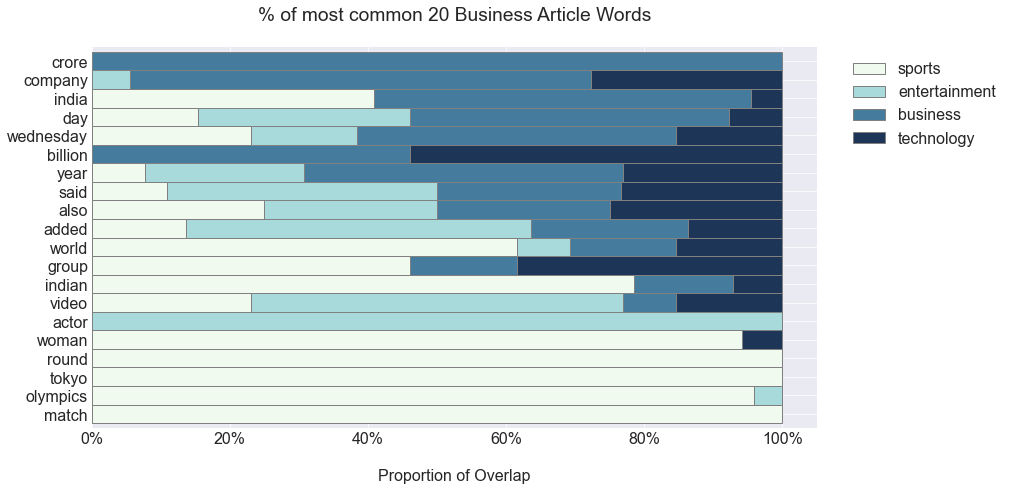

In [393]:

plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(news_word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='business')
 .plot.barh(stacked=True, width=1, ec='grey', color = colors))
plt.legend(bbox_to_anchor= (1.03,1))
plt.title('% of most common 20 Business Article Words\n')
plt.xlabel('\nProportion of Overlap')

# make tick lables display as percentages!! 
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.show()


<Figure size 1152x648 with 0 Axes>

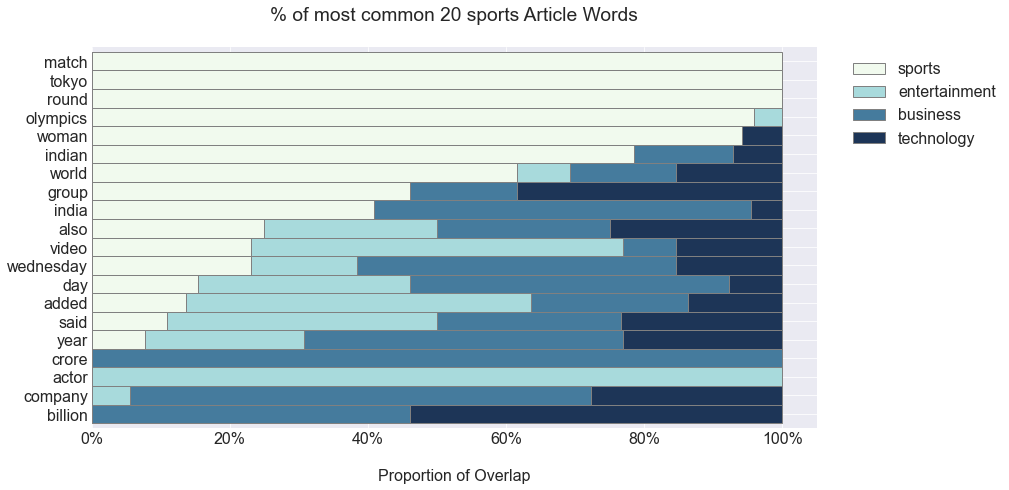

<Figure size 1152x648 with 0 Axes>

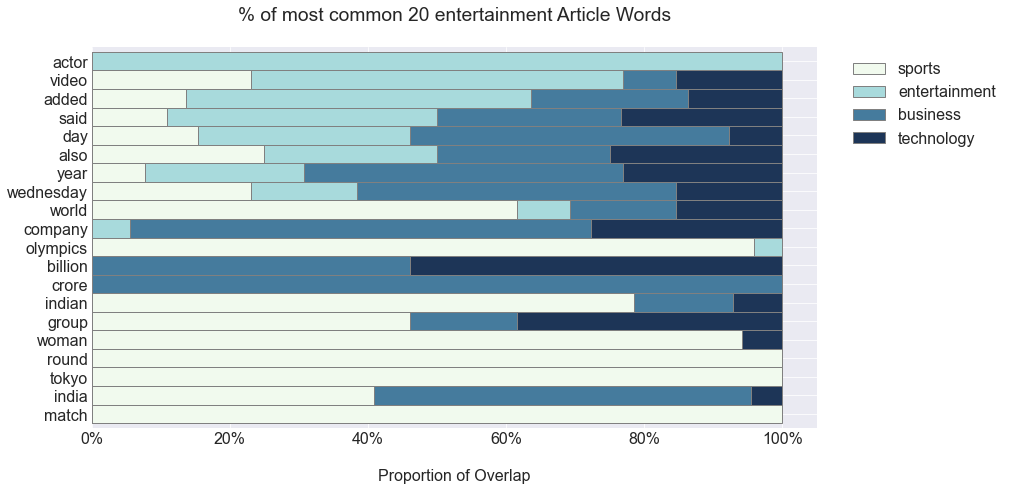

<Figure size 1152x648 with 0 Axes>

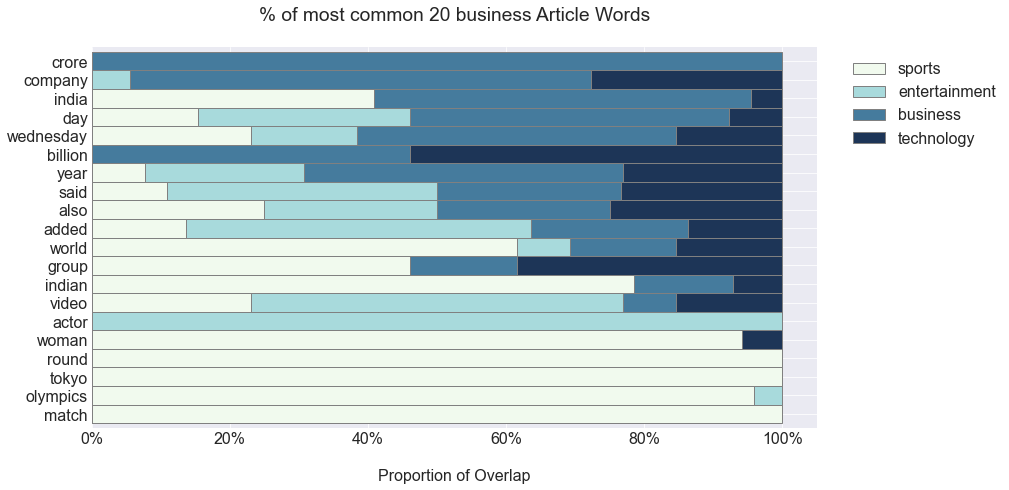

<Figure size 1152x648 with 0 Axes>

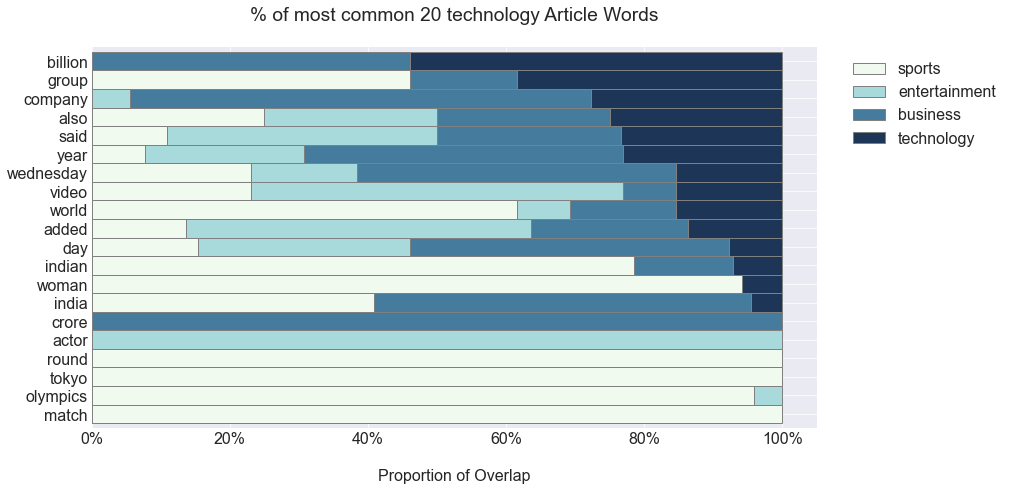

In [394]:
for category in list(news_df['category'].unique()):
    
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    # axis=1 in .apply means row by row
    (news_word_counts.sort_values(by='all', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all'], axis=1)
     .drop(columns='all')
     .sort_values(by=category)
     .plot.barh(stacked=True, width=1, ec='grey', color = colors))
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.title(f'% of most common 20 {category} Article Words\n')
    plt.xlabel('\nProportion of Overlap')
    # make tick lables display as percentages!! 
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    
    plt.show()


In [376]:
words = ' '.join(news_df.lemmatized)
    
news_words_list = words.split()

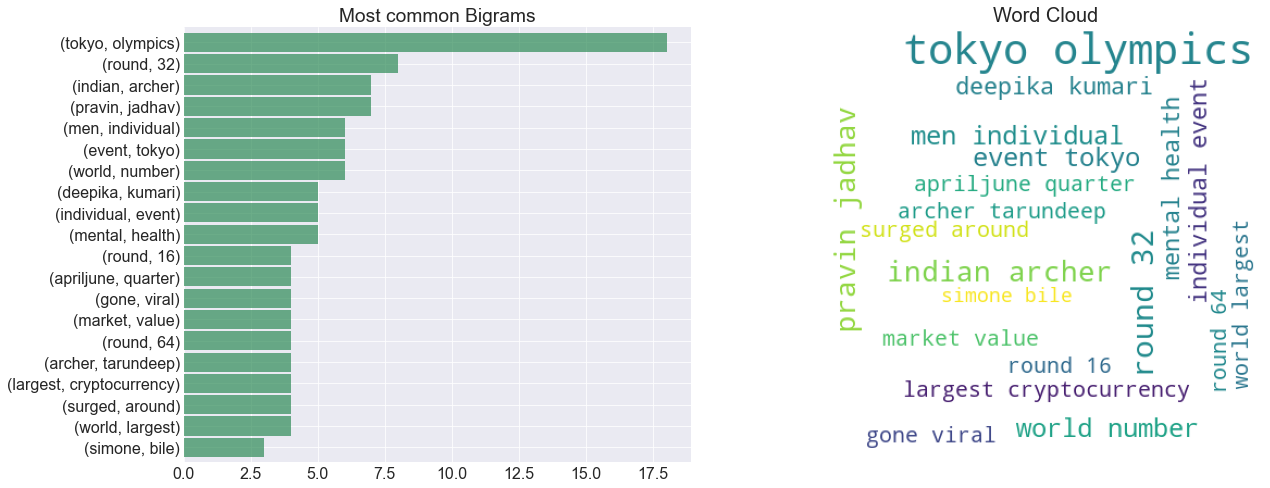

In [385]:

# create Bigrams

bigrams = pd.Series(nltk.bigrams(news_words_list)).value_counts().head(20)


plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
# plot bigrams
bigrams.sort_values(ascending = True).plot.barh(color = 'seagreen', alpha = .7, width = .9)
plt.title('Most common Bigrams')

# create dictionary of words from the bigrams
data = {k[0] + ' ' + k[1]: v for k, v in bigrams.to_dict().items()}

# create wordcloud image
img = WordCloud(background_color='white', width=400, height=400).generate_from_frequencies(data)

plt.subplot(1, 2, 2)
# show image
plt.imshow(img)
plt.axis('off')
plt.title("Word Cloud", font = 'Arial', fontsize= 20)
plt.show()

In [388]:
def ngram_count_word_cloud(words_list, top_num = 20, n = 2):
    '''
    This function takes in a words_list
    Creates bigrams
    Plots the counts on a bar chart and a wordcloud 
    Optional arguements to change customization
    - top_num: default 20, shows most common number of bigrams
    - n: default 2 (bigrams), number of words for n-grams
    '''

    # create Ngrams
    ngrams = pd.Series(nltk.ngrams(words_list, n)).value_counts().head(top_num)
    
    # set up figuresize
    plt.figure(figsize = (20, 8))
    
    # plot bigrams on left subplot
    plt.subplot(1, 2, 1)
    ngrams.sort_values(ascending = True).plot.barh(color = 'seagreen', alpha = .7, width = .9)
    plt.title(f'Most common n-grams ({n})')
    
    # create dictionary of words from the bigrams
    data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ngrams.to_dict().items()}
    
    # create wordcloud image
    img = WordCloud(background_color='white', width=400, height=400).generate_from_frequencies(data)
    
    # plot worcloud on right subplot
    plt.subplot(1, 2, 2)
    # show image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Word Cloud", font = 'Arial', fontsize= 20)
    plt.show()
        

In [ ]:
# figure out how to create string from all words in the tuple no matter the length
# that's what you're trying to do here 

word_combo = k[0]

for i in range(1, len(k)):
    
    word_combo = word_combo + ' '+ k[i]

data = {word_combo : v}

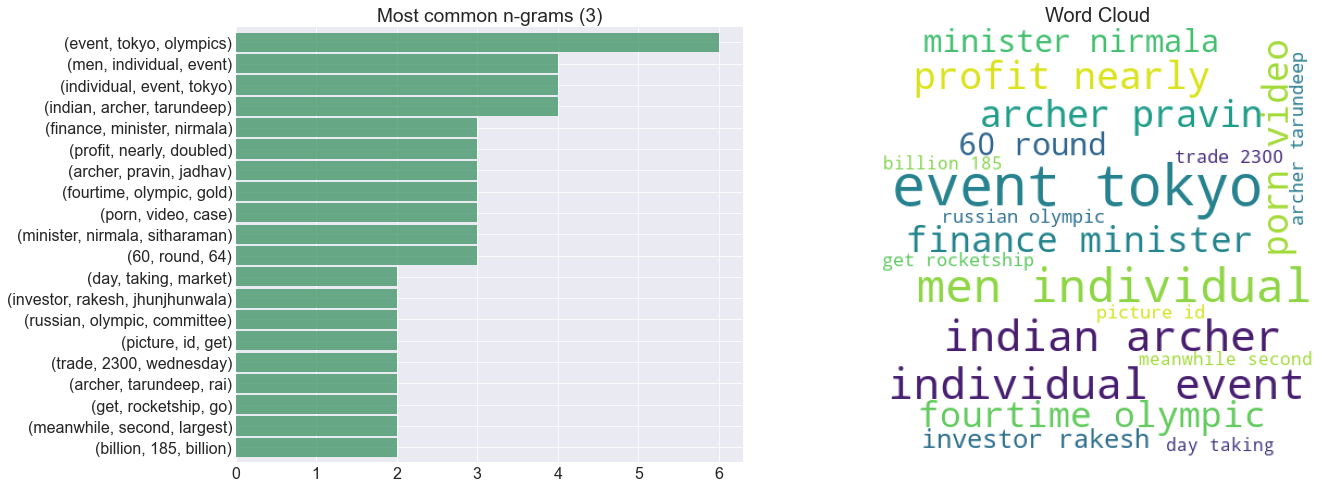

In [390]:
ngram_count_word_cloud(news_words_list, n = 3)

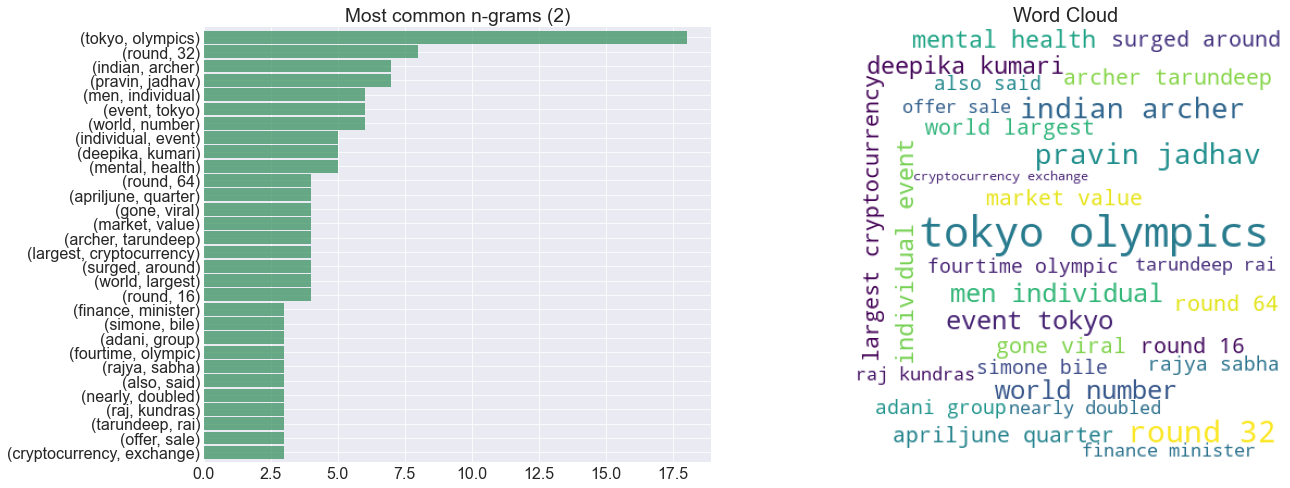

In [391]:
ngram_count_word_cloud(news_words_list, top_num=30, n = 2)